In [ ]:
# show loss 
import matplotlib.pyplot as plt
import pandas as pd

loss = pd.read_csv('output/cyclegan/loss.csv')
x = loss['epoch'].tolist()

plt.figure(figsize=(20,20))
for i in range(0,5):
    label = loss.columns.tolist()[i+1]
    loss_ = loss[label].tolist()
    axis = plt.subplot(2,3,i+1)
    axis.set_xlabel('epoch')
    axis.set_ylabel(label)
    axis.plot(x,loss_)
plt.show()

In [ ]:
# 查看segmentation任务的情况
import matplotlib.pyplot as plt
import pandas as pd

loss = pd.read_csv('output/seg/loss.csv')
x = loss['epoch'].tolist()

plt.figure(figsize=(20,20))
for i in range(0,13):
    label = loss.columns.tolist()[i+1]
    loss_ = loss[label].tolist()
    axis = plt.subplot(2,3,i+1)
    axis.set_xlabel('epoch')
    axis.set_ylabel(label)
    axis.plot(x,loss_)
plt.show()

/home/lucar/anaconda3/envs/d2l/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


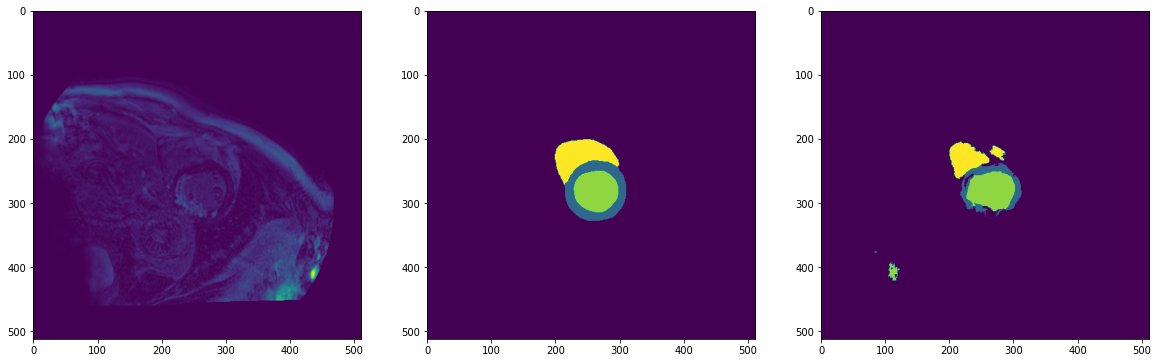

In [1]:
# 查看分割效果
# model
import torch
import numpy as np
from datasets import *
from models import MUnet
import torch.nn.functional as F
from utils import onehot2mask
import matplotlib.pyplot as plt
model = MUnet(1,4)
# load state dict
model.load_state_dict(torch.load('output/seg/best_dice.pth'))
model.eval()
# data (ues )
types = ['LGE']
data = load_image(str=types,paired_label=True)
index = 10
image = data['image'][index]
label = data['label'][index]
input = torch.tensor(image).unsqueeze(dim=0)
nor_i = minmax_normal(input).unsqueeze(dim=0)
# do test
predict = model(nor_i)
output = F.softmax(predict.detach(),dim=1).squeeze(dim=0)
remark = [[0.0],[200.0],[500.0],[600.0]]
label_ = onehot2mask(output,remark)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(image)
plt.subplot(1,3,2)
plt.imshow(label)
plt.subplot(1,3,3)
plt.imshow(label_)